# data overview

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bank_full_df = pd.read_csv('https://raw.githubusercontent.com/chau25102001/myrep/main/bank-full.csv', encoding = "Latin-1")
bank_full_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [75]:
bank_full_df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

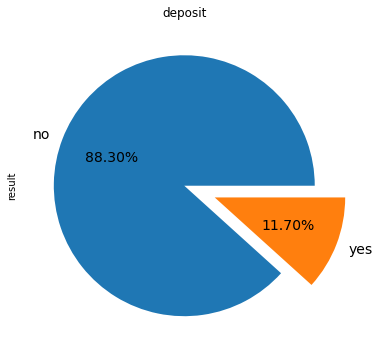

In [76]:
data = bank_full_df.y.value_counts()
data.plot.pie(figsize=(10,6), ylabel = 'result', fontsize = 14, autopct='%1.2f%%', title = 'deposit', explode=[0,0.25])

>the class label is highly imbalance, over will balance it by undersampling

In [77]:
from sklearn.utils import shuffle

In [78]:
# from domain specific knowledge, we balance data by taking 11162 examples and keep all the 'yes' class label
bank_yes = bank_full_df.loc[bank_full_df.y == 'yes']
bank_no = bank_full_df.loc[bank_full_df.y == 'no'].sample(n = 11162 - 5289)
new_df = shuffle(pd.concat([bank_yes, bank_no])).reset_index(drop = 1)
new_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,39,blue-collar,married,primary,no,119,yes,no,cellular,21,nov,271,2,-1,0,unknown,no
1,26,blue-collar,married,secondary,no,-11,yes,yes,cellular,17,jul,1150,3,-1,0,unknown,yes
2,34,blue-collar,single,secondary,no,62,yes,no,cellular,14,may,105,1,-1,0,unknown,no
3,35,technician,single,tertiary,no,59,yes,no,unknown,28,may,145,3,-1,0,unknown,no
4,28,self-employed,single,tertiary,no,442,no,no,cellular,19,jun,474,3,95,3,other,yes


In [79]:
new_df.y.value_counts()

no     5873
yes    5289
Name: y, dtype: int64

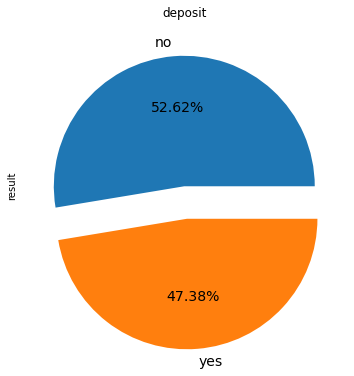

In [80]:
data = new_df.y.value_counts()
data.plot.pie(figsize=(10,6), ylabel = 'result', fontsize = 14, autopct='%1.2f%%', title = 'deposit', explode=[0,0.25])

In [81]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  y          11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


# attributes: categorical and numerical overview

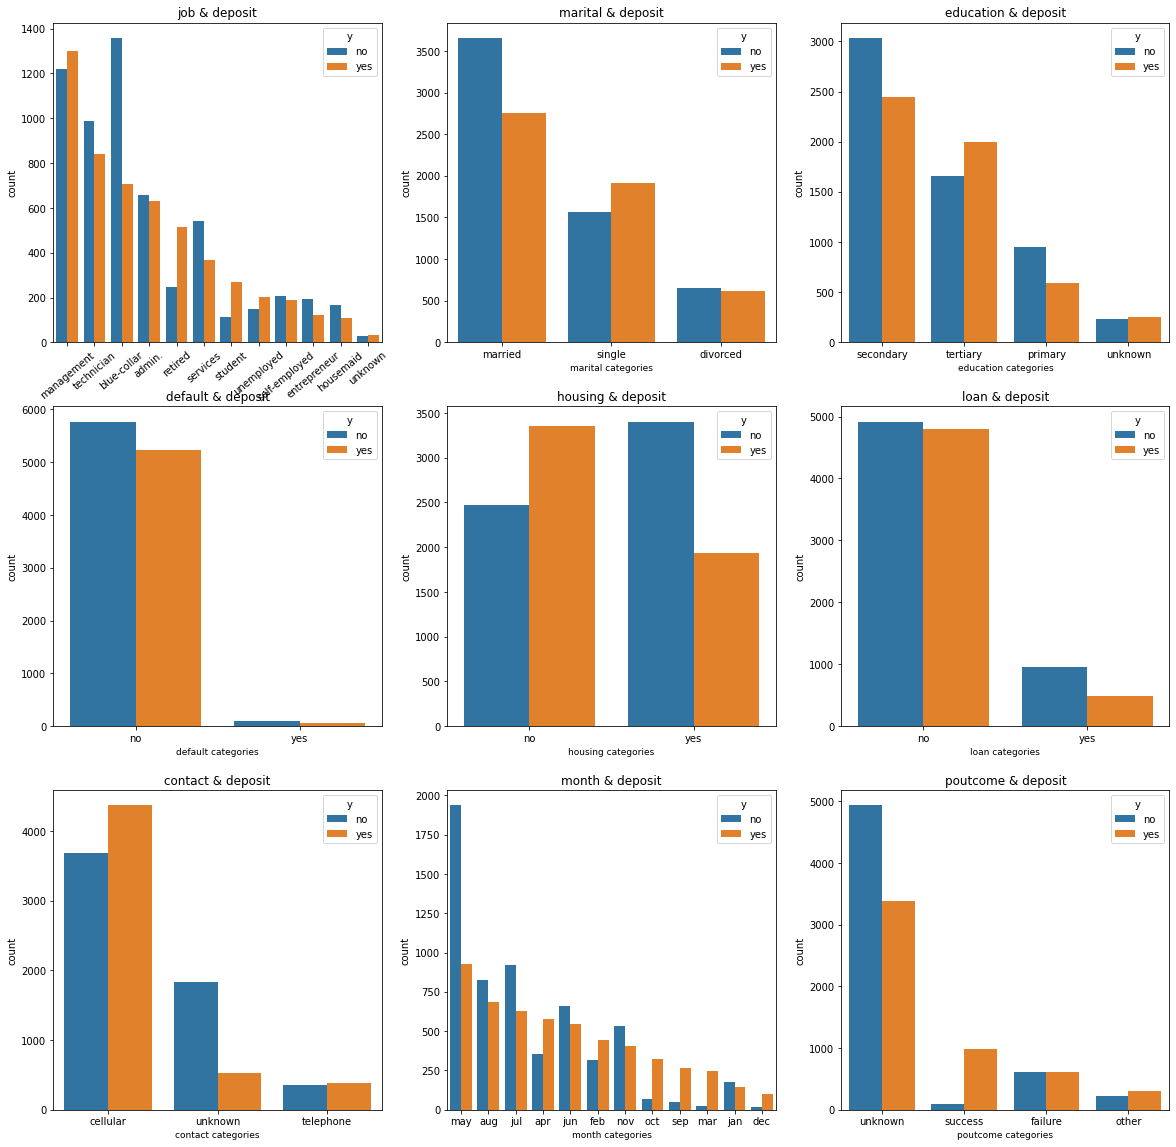

In [82]:
# categorical attributes
categories = ['job', 'marital','education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
fig, ax = plt.subplots(figsize = (20,20), ncols=3, nrows = 3)
count =0
for col in categories:
    g=sns.countplot(x = col, data = new_df, hue = 'y', order = bank_yes[col].value_counts().index, ax = ax[count//3, count%3])
    g.set_title(col+' & deposit')
    g.set_xlabel(col + ' categories',fontsize = 9)
    if col == 'job':
        plt.setp(g.get_xticklabels(), rotation=40)
    count+=1

> here we see job, education, contact and poutcome have unkown/missing values
> with job, education, contact we impute missing values by apply most-frequent strategy
> with poutcome since unkown values appears more than 80%, we consider dropping it
> other categorical attribute will be convert into numerical by number 1, 2, 3, ...

In [83]:
new_df.age.to_numpy()

array([39, 26, 34, ..., 80, 24, 60])

In [84]:
numerical = new_df.select_dtypes(exclude='object')
outlier = {}
for col in numerical:
    outlier[col] = []
    data = new_df[col].to_numpy()
    mean = new_df[col].mean()
    std = new_df[col].std()
    count_ouliers = 0
    for i in range(len(data)):
        z = (data[i]-mean)/std
        if z >3 or z<-3:
            count_ouliers+=1
            outlier[col].append(i)
    print(col+': ', count_ouliers)
outlier_age = outlier['age']
outlier_balance = outlier['balance']
outlier_duration = outlier['duration']
outlier_previous = outlier['previous']
outlier_campaign = outlier['campaign']
a=list(set(outlier_balance+outlier_campaign+outlier_previous))
len(a)

age:  123
balance:  198
day:  0
duration:  203
campaign:  213
pdays:  172
previous:  220


623

count    11162.000000
mean        41.172102
std         11.859617
min         18.000000
25%         32.000000
50%         39.000000
75%         49.000000
max         95.000000
Name: age, dtype: float64 

count    11162.000000
mean      1515.396703
std       3060.041290
min      -8019.000000
25%        118.250000
50%        538.000000
75%       1713.750000
max      81204.000000
Name: balance, dtype: float64 

count    11162.000000
mean        15.560831
std          8.377031
min          1.000000
25%          8.000000
50%         15.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64 

count    11162.000000
mean       369.479394
std        343.726766
min          2.000000
25%        140.000000
50%        255.000000
75%        485.000000
max       3881.000000
Name: duration, dtype: float64 

count    11162.000000
mean         2.510303
std          2.698301
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000

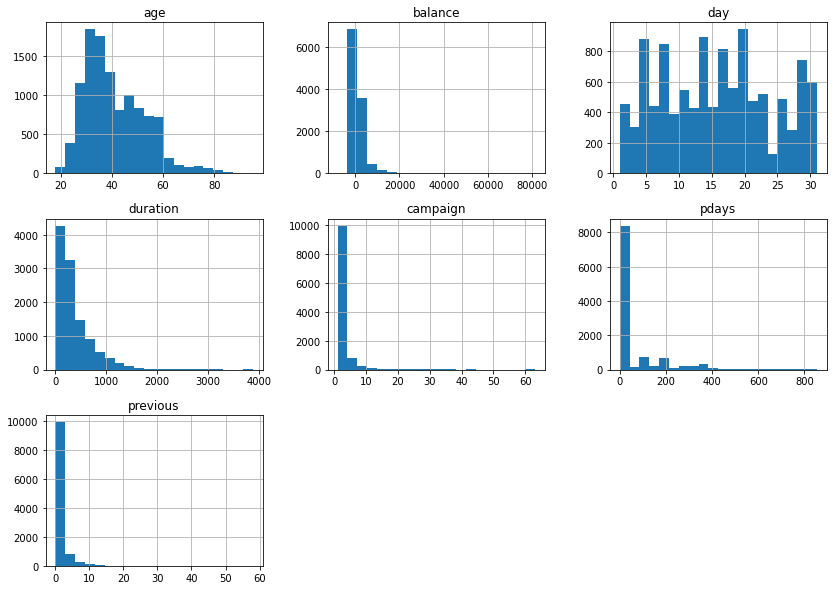

In [85]:
# numerical attributes
for col in numerical:
    print(new_df[col].describe(),"\n")
new_df.drop(columns='y').hist(bins = 20, figsize=(14,10))
plt.show()

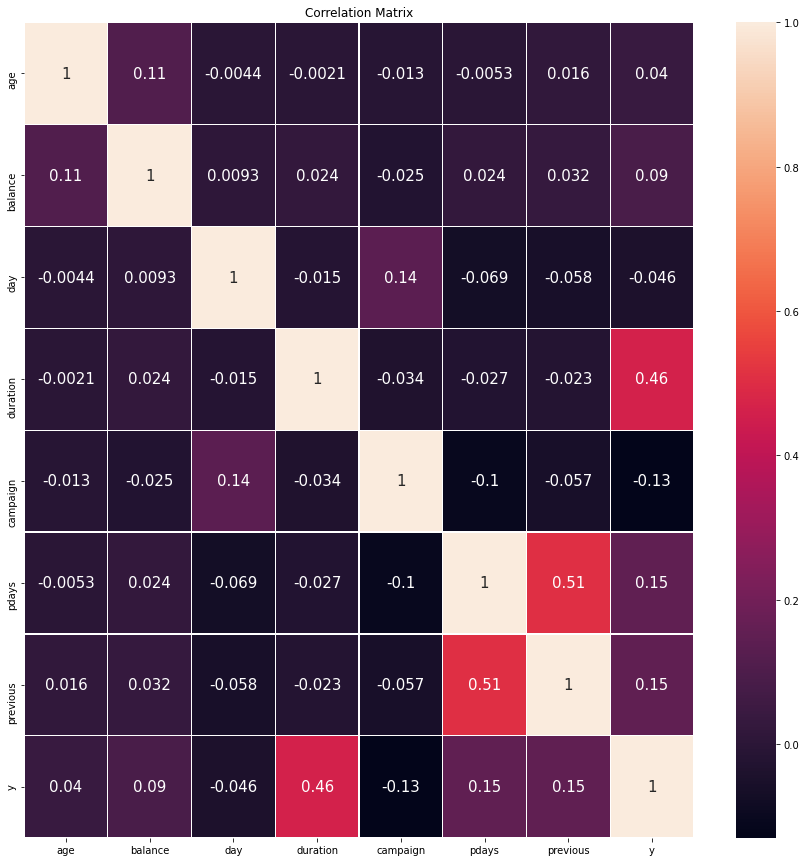

In [86]:
def tran_y(x):
    return 0 if x == 'no' else 1 if x == 'yes' else x
new_df.y = new_df.y.apply(tran_y )
plt.subplots(figsize = (15,15))
plt.title('Correlation Matrix')
sns.heatmap(data = new_df.corr(), annot=True, linewidths=0.2,annot_kws={'size' : 15})

>pdays and poutcome do not correlate to the outcome much so we can drop those attributes
Why?


# imputing missing values

In [15]:
from sklearn.impute import SimpleImputer
imputer_mode = SimpleImputer(missing_values= 'unknown', strategy= 'most_frequent')
new_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

# categorical data transformation

In [87]:
data1 = new_df.copy()
data1['job'] = data1['job'].astype('category').cat.codes
data1['marital'] = data1['marital'].astype('category').cat.codes
data1['education'] = data1['education'].astype('category').cat.codes
data1['contact'] = data1['contact'].astype('category').cat.codes
data1['poutcome'] = data1['poutcome'].astype('category').cat.codes
data1['month'] = data1['month'].astype('category').cat.codes
data1['default'] = data1['default'].astype('category').cat.codes
data1['loan'] = data1['loan'].astype('category').cat.codes
data1['housing'] = data1['housing'].astype('category').cat.codes
data1['job'].value_counts()
new_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,39,blue-collar,married,primary,no,119,yes,no,cellular,21,nov,271,2,-1,0,unknown,0
1,26,blue-collar,married,secondary,no,-11,yes,yes,cellular,17,jul,1150,3,-1,0,unknown,1
2,34,blue-collar,single,secondary,no,62,yes,no,cellular,14,may,105,1,-1,0,unknown,0
3,35,technician,single,tertiary,no,59,yes,no,unknown,28,may,145,3,-1,0,unknown,0
4,28,self-employed,single,tertiary,no,442,no,no,cellular,19,jun,474,3,95,3,other,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,26,entrepreneur,single,tertiary,no,725,no,no,cellular,5,feb,1916,2,189,29,other,1
11158,25,student,single,secondary,no,1790,no,no,cellular,17,apr,224,1,322,3,failure,0
11159,80,retired,married,secondary,no,2,no,no,telephone,15,oct,442,1,-1,0,unknown,0
11160,24,management,single,tertiary,no,507,no,no,cellular,3,jul,257,1,-1,0,unknown,1


In [88]:
from sklearn.preprocessing import OneHotEncoder
cat_columns = new_df.select_dtypes(include='object')
one = OneHotEncoder(sparse=True)
encoded_c = one.fit_transform(cat_columns)

columns = new_df.columns
# transformed_data = pd.DataFrame(np.concatenate([numerical,encoded_c],axis=1))
new = pd.DataFrame(encoded_c)
print(encoded_c)

  (0, 1)	1.0
  (0, 13)	1.0
  (0, 15)	1.0
  (0, 19)	1.0
  (0, 22)	1.0
  (0, 23)	1.0
  (0, 25)	1.0
  (0, 37)	1.0
  (0, 43)	1.0
  (1, 1)	1.0
  (1, 13)	1.0
  (1, 16)	1.0
  (1, 19)	1.0
  (1, 22)	1.0
  (1, 24)	1.0
  (1, 25)	1.0
  (1, 33)	1.0
  (1, 43)	1.0
  (2, 1)	1.0
  (2, 14)	1.0
  (2, 16)	1.0
  (2, 19)	1.0
  (2, 22)	1.0
  (2, 23)	1.0
  (2, 25)	1.0
  :	:
  (11159, 16)	1.0
  (11159, 19)	1.0
  (11159, 21)	1.0
  (11159, 23)	1.0
  (11159, 26)	1.0
  (11159, 38)	1.0
  (11159, 43)	1.0
  (11160, 4)	1.0
  (11160, 14)	1.0
  (11160, 17)	1.0
  (11160, 19)	1.0
  (11160, 21)	1.0
  (11160, 23)	1.0
  (11160, 25)	1.0
  (11160, 33)	1.0
  (11160, 43)	1.0
  (11161, 4)	1.0
  (11161, 13)	1.0
  (11161, 18)	1.0
  (11161, 19)	1.0
  (11161, 21)	1.0
  (11161, 23)	1.0
  (11161, 27)	1.0
  (11161, 34)	1.0
  (11161, 43)	1.0


In [89]:
from sklearn.feature_extraction.text import CountVectorizer
train = new_df.copy()
vectorizer = CountVectorizer(vocabulary=train.poutcome.unique())
x_train_poutcome = vectorizer.fit_transform(train.poutcome)
x_train_poutcome


<11162x4 sparse matrix of type '<class 'numpy.int64'>'
	with 11162 stored elements in Compressed Sparse Row format>

In [90]:
def tran_job(data):
  data.loc[data['job'] == 'housemaid', 'job'] = 1
  data.loc[data['job'] == 'entrepreneur','job'] = 2
  data.loc[data['job'] ==  'self-employed', 'job'] = 3
  data.loc[data['job'] == 'unemployed', 'job'] = 4
  data.loc[data['job'] == 'student', 'job'] = 5
  data.loc[data['job'] == 'services', 'job'] = 6
  data.loc[data['job'] == 'retired', 'job'] = 7
  data.loc[data['job'] == 'admin.', 'job'] = 8
  data.loc[data['job'] == 'blue-collar', 'job'] = 9
  data.loc[data['job'] == 'technician', 'job'] = 10
  data.loc[data['job'] == 'management', 'job'] = 11
  return data
def tran_marital(data):
  data.loc[data['marital'] == 'married','marital'] = 3
  data.loc[data['marital'] == 'single','marital'] = 2
  data.loc[data['marital'] == 'divorced','marital'] = 1
  return data
def tran_education(data):
  data.loc[data['education'] == 'tertiary'] = 3
  data.loc[data['education'] == 'secondary'] = 2
  data.loc[data['education'] == 'primary'] = 1
  return data
def tran_contact(data):
  data.loc[data['contact'] == 'cellular'] = 1
  data.loc[data['contact'] == 'telephone'] = 0
  return data
def tran_month(data):
  data.loc[data['month'] == 'jan'] = 1
  data.loc[data['month'] == 'feb'] = 2
  data.loc[data['month'] == 'mar'] = 3
  data.loc[data['month'] == 'apr'] = 4
  data.loc[data['month'] == 'may'] = 5
  data.loc[data['month'] == 'jun'] = 6
  data.loc[data['month'] == 'jul'] = 7
  data.loc[data['month'] == 'aug'] = 8
  data.loc[data['month'] == 'sep'] = 9
  data.loc[data['month'] == 'oct'] = 10
  data.loc[data['month'] == 'nov'] = 11
  data.loc[data['month'] == 'dec'] = 12
  return data
def tran_y(data):
  data.loc[data['y'] == 'yes','y'] = 1
  data.loc[data['y'] == 'no','y'] = 0
  return data
data = new_df.copy()
dt1 = tran_education(data)['job']
dt1.value_counts()

2                5485
3                3650
1                1540
blue-collar       102
management         76
student            61
technician         59
admin.             42
retired            40
services           38
unknown            26
entrepreneur       15
housemaid          13
unemployed          8
self-employed       7
Name: job, dtype: int64

why dont use get_dummy for job

In [91]:
def tran_job(x):
  if x == 'housemaid':
    return 1
  if x == 'entrepreneur':
    return 2
  if x == 'self-employed':
    return 3
  if x == 'unemployed':
    return 4
  if x == 'student':
    return 5
  if x == 'services':
    return 6
  if x == 'retired':
    return 7
  if x == 'admin.':
    return 8
  if x == 'blue-collar':
    return 9
  if x == 'technician':
    return 10
  if x == 'management':
    return 11
  else:
    return x
def tran_marital(x):
  if x == 'married':
    return 3
  if x == 'single':
    return 2
  if x == 'divorced':
    return 1
  else:
    return x
def tran_education(x):
  if x == 'secondary':
    return 3
  if x == 'tertiary':
    return 2
  if x == 'primary':
    return 1
  else:
    return x
def tran_binary_no(x):
  if x == 'no':
    return 1
  if x =='yes':
    return 0
  else:
    return x
def tran_contact(x):
    if x == 'cellular':
        return 1
    if x == 'telephone':
        return 0
    else:
        return x
def tran_month(x):
    if x == 'dec':
        return 1
    if x == 'jan':
        return 2
    if x == 'mar':
        return 3
    if x == 'sep':
        return 4
    if x == 'oct':
        return 5
    if x == 'nov':
        return 6
    if x == 'feb':
        return 7
    if x == 'jun':
        return 8
    if x == 'apr':
        return 9
    if x == 'jul':
        return 10
    if x == 'aug':
        return 11
    if x == 'may':
        return 12
def tran_y(x):
    if x == 'yes':
        return 1
    if x == 'no':
        return 0
    else:
        return x

# group age, duration and remove outliers from balance, campaign, previous

In [92]:
new_df.duration.describe()

count    11162.000000
mean       369.479394
std        343.726766
min          2.000000
25%        140.000000
50%        255.000000
75%        485.000000
max       3881.000000
Name: duration, dtype: float64

not good since each running time, the group info will different

In [93]:
def duration_group( x):
    if x <=102:
        return 1
    elif x<=180:
        return 2
    elif x <=319:
        return 3
    elif x<=644.5:
        return 4
    else:
        return 5
def age_group(x):
    if x <=32:
        return 1
    elif x <= 47:
        return 2
    elif x <= 70:
        return 3
    else:
        return 4
def remove_outliers(data):
    new = data.copy()
    numerical = ['balance', 'previous', 'campaign']
    outlier = {}
    for col in numerical:
        outlier[col] = []
        data = new_df[col].to_numpy()
        mean = new_df[col].mean()
        std = new_df[col].std()
        count_ouliers = 0
        for i in range(len(data)):
            z = (data[i]-mean)/std
            if z >3 or z<-3:
                count_ouliers+=1
                outlier[col].append(i)
    o = list(set(outlier['balance']+outlier['previous']+outlier['campaign']))
    new.drop(new.index[o], inplace = True)
    return new
remove_outliers(new_df)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,39,blue-collar,married,primary,no,119,yes,no,cellular,21,nov,271,2,-1,0,unknown,0
1,26,blue-collar,married,secondary,no,-11,yes,yes,cellular,17,jul,1150,3,-1,0,unknown,1
2,34,blue-collar,single,secondary,no,62,yes,no,cellular,14,may,105,1,-1,0,unknown,0
3,35,technician,single,tertiary,no,59,yes,no,unknown,28,may,145,3,-1,0,unknown,0
4,28,self-employed,single,tertiary,no,442,no,no,cellular,19,jun,474,3,95,3,other,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,42,services,married,secondary,no,2145,no,no,cellular,20,nov,124,3,-1,0,unknown,0
11158,25,student,single,secondary,no,1790,no,no,cellular,17,apr,224,1,322,3,failure,0
11159,80,retired,married,secondary,no,2,no,no,telephone,15,oct,442,1,-1,0,unknown,0
11160,24,management,single,tertiary,no,507,no,no,cellular,3,jul,257,1,-1,0,unknown,1


In [55]:
# remove outliers
from scipy.stats import zscore
def removeoutliers(data):
  dataset = new_df.copy()

  numerical = ['balance','previous','campaign']
  for col in numerical:
    dataset[col +'_outliers'] = dataset[col]
    dataset[col +'_outliers']= zscore(dataset[col +'_outliers'])
    condition1 = (dataset[col +'_outliers']>3) | (dataset[col +'_outliers']<-3 )
    dataset1 = dataset.drop(dataset[condition1].index, axis = 0, inplace = False)
  # dataset.drop(columns = ['balance_outliers','previous_outliers','campaign_outliers'],inplace = True)
  return dataset1




,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,50,management,married,tertiary,no,398,no,no,telephone,30,jul,1567,5,-1,0,unknown,0
1,70,retired,married,primary,no,2795,no,no,cellular,8,jan,301,2,-1,0,unknown,1
2,38,self-employed,single,tertiary,no,973,no,no,cellular,4,feb,138,1,-1,0,unknown,0
3,42,admin.,divorced,secondary,no,490,yes,no,cellular,8,feb,203,2,188,1,failure,0
4,44,entrepreneur,divorced,secondary,no,1,no,no,cellular,31,jul,388,4,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,32,technician,divorced,tertiary,no,2558,no,no,unknown,5,may,148,2,-1,0,unknown,0
11158,56,technician,married,tertiary,no,1181,no,no,cellular,28,jan,186,1,433,1,failure,1
11159,27,entrepreneur,married,secondary,no,47,yes,no,unknown,18,jun,114,4,-1,0,unknown,0
11160,26,management,married,tertiary,no,243,no,no,cellular,26,may,482,1,-1,0,unknown,1


In [105]:
imputer_mode = SimpleImputer(missing_values= 'unknown', strategy= 'most_frequent')
unknown = dataset[['job','education','contact']]
transform = imputer_mode.fit_transform(unknown)
dataset = pd.DataFrame(transform, columns = ['job','education','contact'])
transform = pd.DataFrame(transform, columns=['job','education','contact'])
dataset

,job,education,contact
0,blue-collar,primary,cellular
1,blue-collar,secondary,cellular
2,blue-collar,secondary,cellular
3,technician,tertiary,cellular
4,self-employed,tertiary,cellular
...,...,...,...
10959,entrepreneur,tertiary,cellular
10960,student,secondary,cellular
10961,retired,secondary,telephone
10962,management,tertiary,cellular


In [ ]:
dataset.info()
new_df.info()
values = dataset.values


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10566 entries, 0 to 11161
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        10566 non-null  int64 
 1   job        10005 non-null  object
 2   marital    10566 non-null  object
 3   education  10005 non-null  object
 4   default    10566 non-null  object
 5   balance    10566 non-null  int64 
 6   housing    10566 non-null  object
 7   loan       10566 non-null  object
 8   contact    10005 non-null  object
 9   day        10566 non-null  int64 
 10  month      10566 non-null  object
 11  duration   10566 non-null  int64 
 12  campaign   10566 non-null  int64 
 13  previous   10566 non-null  int64 
 14  y          10566 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 1.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------

# transform the dataset and normalize data

In [73]:
from sklearn.preprocessing import StandardScaler
def preprocessing(dataframe):
    copy_df = dataframe.copy()
    columns = copy_df.columns
    imputer_mode = SimpleImputer(missing_values= 'unknown', strategy= 'most_frequent')
    copy_df = imputer_mode.fit_transform(copy_df)
    copy_df = pd.DataFrame(copy_df, columns = columns)
    copy_df.job = copy_df.job.apply(tran_job)
    copy_df.marital = copy_df.marital.apply(tran_marital)
    copy_df.education = copy_df.education.apply(tran_education)
    copy_df.default = copy_df.default.apply(tran_binary_no)
    copy_df.housing = copy_df.housing.apply(tran_binary_no)
    copy_df.loan = copy_df.loan.apply(tran_binary_no)
    copy_df.contact = copy_df.contact.apply(tran_contact)
    copy_df.month = copy_df.month.apply(tran_month)
    copy_df = copy_df.drop(columns = ['poutcome', 'pdays'])
    copy_df.age = copy_df.age.apply(age_group)
    copy_df.duration = copy_df.duration.apply(duration_group)
    copy_df.y = copy_df.y.apply(tran_y)
    copy_df = remove_outliers(copy_df).reset_index(drop = 1)
    
    feature = []
    for i in columns:
        if i not in ['y', 'poutcome', 'pdays']:
            feature.append(i)
    scaler = StandardScaler()
    X = scaler.fit_transform(copy_df.drop(columns = 'y'))
    y = copy_df.y
    X = pd.DataFrame(X, columns = feature);
    copy_df = pd.concat([X, y], axis= 1)
    
    return copy_df

In [107]:
input_df = preprocessing(new_df)
input_df.to_csv(r'C:\Users\chau\encoded_data.csv', index = False, header=True)
input_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,y
0,-0.042470,0.292152,0.781429,-1.941031,0.119344,-0.612084,-1.040382,0.387841,0.263657,0.662844,-1.032351,-0.054794,-0.146710,-0.456251,0
1,-1.321289,0.292152,0.781429,0.836501,0.119344,-0.683318,-1.040382,-2.578379,0.263657,0.184182,0.351382,1.474932,0.452351,-0.456251,1
2,-0.042470,0.292152,-0.660861,0.836501,0.119344,-0.643318,-1.040382,0.387841,0.263657,-0.174814,1.043248,-0.819657,-0.745770,-0.456251,0
3,-0.042470,0.665000,-0.660861,-0.552265,0.119344,-0.644962,-1.040382,0.387841,0.263657,1.500502,1.043248,-0.819657,0.452351,-0.456251,0
4,-1.321289,-1.944941,-0.660861,-0.552265,0.119344,-0.435095,0.961185,0.387841,0.263657,0.423513,-0.340484,0.710069,0.452351,1.806893,1


# spliting the dataset into train and test set in a stratified way to preserve the distribution of data

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
# Here we split the data into training and test sets and implement a stratified shuffle split.
stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
X = input_df.drop(columns='y')
y = input_df.y

for train_set, test_set in stratified.split(X, X["loan"]):
    stratified_train = X.loc[train_set]
    stratified_test = X.loc[test_set]
    
stratified_train["loan"].value_counts()/len(stratified_train)
stratified_train.reset_index(drop = 1)
y_train = y[stratified_train.index]
y_test = y[stratified_test.index]

In [ ]:
stratified_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous
7070,-0.043010,-0.072352,0.784000,0.825006,0.119597,-0.679300,0.961009,-2.535819,-3.768671,-0.052133,0.368579,0.708277,0.475117,-0.458100
946,-0.043010,-0.818907,0.784000,0.825006,0.119597,-0.679300,0.961009,0.394350,0.265346,1.622136,1.059199,1.472851,-0.129859,-0.458100
7441,1.244374,-0.445630,0.784000,-1.960428,0.119597,-0.565567,0.961009,0.394350,0.265346,-0.769676,-0.667351,0.708277,-0.734835,-0.458100
7730,-0.043010,0.300925,0.784000,-1.960428,0.119597,-1.019395,-1.040573,0.394350,0.265346,0.187049,-0.322041,0.708277,-0.129859,-0.458100
855,1.244374,1.047480,-2.110897,-0.567711,0.119597,-0.534650,0.961009,0.394350,0.265346,-1.248039,1.059199,-0.820872,-0.734835,-0.458100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8743,1.244374,0.674203,0.784000,-1.960428,0.119597,0.025181,-1.040573,0.394350,0.265346,-0.171723,0.368579,-0.820872,1.080093,-0.458100
7744,1.244374,-0.072352,-2.110897,0.825006,0.119597,-0.701937,-1.040573,-2.535819,0.265346,-1.128448,-0.667351,1.472851,-0.734835,0.280199
1562,-0.043010,-2.685295,0.784000,0.825006,0.119597,1.865889,0.961009,0.394350,0.265346,-0.171723,0.713889,-0.820872,-0.129859,-0.458100
10012,-1.330394,-0.818907,-0.663448,0.825006,0.119597,-0.189586,0.961009,0.394350,0.265346,1.741727,-2.393900,0.708277,-0.734835,-0.458100


# ML models for balanced dataset

# 1. KNN model

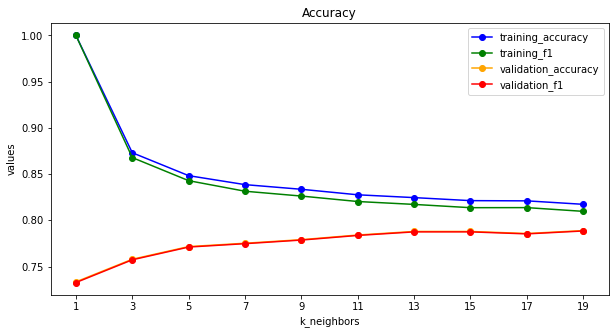

In [ ]:
#here we use validation set to determine the hyper-parameter k

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import cross_val_score
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
k_neighbors = []
for k in range(1,20,2):
    model = KNeighborsClassifier(n_neighbors=k, weights='uniform', p = 1)
    model.fit(stratified_train, y_train)
    y_pred_train = model.predict(stratified_train)
    training_accuracy.append(accuracy_score(y_pred_train, y_train))
    val_accuracy.append(cross_val_score(model, stratified_train, y_train, scoring= 'accuracy', cv = 5).mean())
    training_f1.append(f1_score(y_pred_train, y_train))
    val_f1.append(cross_val_score(model, stratified_train, y_train, scoring= 'f1_macro', cv = 5).mean())
    k_neighbors.append(k)

plt.subplots(figsize = (10,5))
plt.plot(k_neighbors, training_accuracy, '-ok', label = 'training_accuracy', color = 'blue')
plt.plot(k_neighbors, training_f1,'-ok', label = 'training_f1', color = 'green')
plt.plot(k_neighbors, val_accuracy,'-ok', label = 'validation_accuracy', color = 'orange')
plt.plot(k_neighbors, val_f1,'-ok', label = 'validation_f1', color = 'red')
plt.title('Accuracy')
plt.xlabel("k_neighbors")
plt.ylabel("values")
plt.xticks(k_neighbors)
plt.legend()
plt.show()

In [ ]:
#from the graph we saw k = 13 produces the best result

model = KNeighborsClassifier(n_neighbors= 13, weights= 'uniform', p = 1)
model.fit(stratified_train, y_train)
y_pred = model.predict(stratified_test)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data") 
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8110383536014967
Test F1 Score:  0.7967806841046278
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,942,195,1137
1,209,792,1001
All,1151,987,2138


# Decision tree model

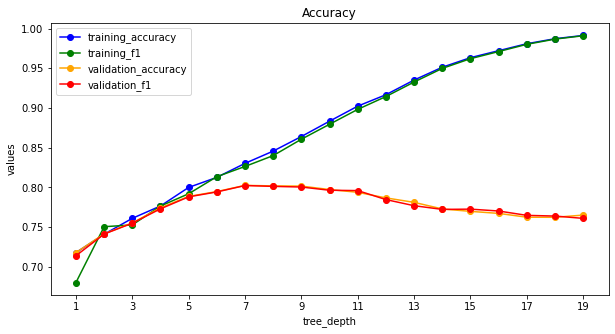

In [ ]:
#here we use validation set to determine the best max_depth of the tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1,20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(stratified_train,y_train)
    y_training_pred = tree_clf.predict(stratified_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,stratified_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,stratified_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)
    

plt.subplots(figsize = (10,5))
plt.plot(tree_depths, training_accuracy, '-ok', label = 'training_accuracy', color = 'blue')
plt.plot(tree_depths, training_f1,'-ok', label = 'training_f1', color = 'green')
plt.plot(tree_depths, val_accuracy,'-ok', label = 'validation_accuracy', color = 'orange')
plt.plot(tree_depths, val_f1,'-ok', label = 'validation_f1', color = 'red')
plt.title('Accuracy')
plt.xlabel("tree_depth")
plt.ylabel("values")
plt.xticks(k_neighbors)
plt.legend()
plt.show()

In [ ]:
# from the graph we saw max_depth = 7 produces the best result

tree_clf = DecisionTreeClassifier(max_depth=7)
tree_clf.fit(stratified_train,y_train)
y_pred = tree_clf.predict(stratified_test)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8115060804490177
Test F1 Score:  0.8015755785327425
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,921,216,1137
1,187,814,1001
All,1108,1030,2138


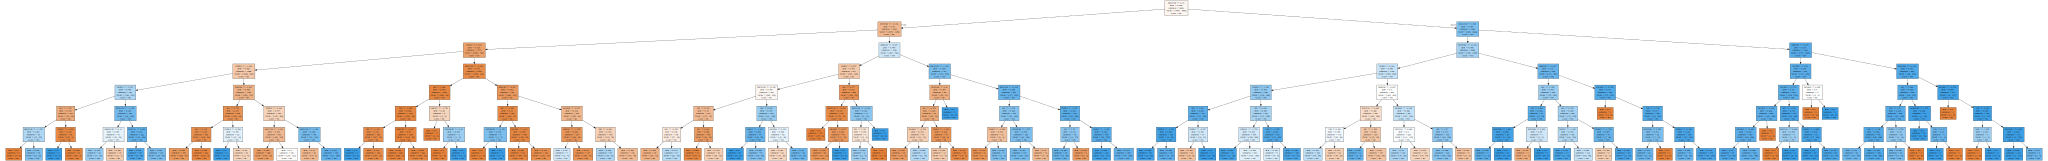

In [ ]:
import graphviz
dot_data = tree.export_graphviz(tree_clf, out_file=None, feature_names=feature, class_names=['no', 'yes'], filled=True)
graph = graphviz.Source(dot_data, format='png')
graph

In [ ]:
#random forest model

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(max_depth=7)
rf_clf.fit(stratified_train,y_train)
y_pred = rf_clf.predict(stratified_train)
print("Train F1 Score ", f1_score(y_train,y_pred))
print("Train Accuracy ", accuracy_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(rf_clf,stratified_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(rf_clf,stratified_train,y_train,cv=5,scoring='accuracy').mean())

Train F1 Score  0.8294283036551079
Train Accuracy  0.8297474275023387
Validation Mean F1 Score:  0.8115001859539275
Validation Mean Accuracy:  0.811740133501492


In [ ]:
y_pred = rf_clf.predict(stratified_test)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8189897100093545
Test F1 Score:  0.814388489208633
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,902,235,1137
1,152,849,1001
All,1054,1084,2138


# ML models for imbalanced dataset

In [ ]:
# encode dataset

imb_df = preprocessing(bank_full_df)
imb_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,y
0,1.304733,1.039161,0.740579,-0.546986,0.135191,0.255548,-0.898605,0.437116,0.263565,-1.298962,0.974077,0.349722,-0.568727,-0.253351,0
1,-0.047451,0.666451,-0.701858,0.810285,0.135191,-0.438065,-0.898605,0.437116,0.263565,-1.298962,0.974077,-0.460878,-0.568727,-0.253351,0
2,-0.047451,-2.315223,0.740579,0.810285,0.135191,-0.446924,-0.898605,-2.287720,0.263565,-1.298962,0.974077,-1.271478,-0.568727,-0.253351,0
3,-0.047451,0.293742,0.740579,0.810285,0.135191,0.046546,-0.898605,0.437116,0.263565,-1.298962,0.974077,-1.271478,-0.568727,-0.253351,0
4,-0.047451,0.293742,-0.701858,0.810285,0.135191,-0.447252,1.112836,0.437116,0.263565,-1.298962,0.974077,0.349722,-0.568727,-0.253351,0


# 1. KNN model

In [ ]:
from sklearn.model_selection import train_test_split
X_imb = imb_df.drop(columns = 'y')
y_imb = imb_df.y
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(X_imb, y_imb, test_size = 0.2, random_state = 42)

knn_imb = KNeighborsClassifier(n_neighbors =5, weights= 'uniform', p =1)
knn_imb.fit(X_train_imb, y_train_imb)
y_pred_imb = model.predict(X_test_imb)

print("Test Accuracy: ",accuracy_score(y_test_imb,y_pred_imb))
print("Test F1 Score: ",f1_score(y_test_imb,y_pred_imb))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test_imb, y_pred_imb, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.7231783638801967
Test F1 Score:  0.4399728690933756
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,5498,2380,7878
1,97,973,1070
All,5595,3353,8948


# 2. Decision tree model

In [ ]:
tree_clf_imb = DecisionTreeClassifier(max_depth=7)
tree_clf_imb.fit(X_train_imb,y_train_imb)
y_pred_imb = tree_clf_imb.predict(X_test_imb)
print("Test Accuracy: ",accuracy_score(y_test_imb,y_pred_imb))
print("Test F1 Score: ",f1_score(y_test_imb,y_pred_imb))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test_imb, y_pred_imb, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8915958873491283
Test F1 Score:  0.41776710684273716
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,7630,248,7878
1,722,348,1070
All,8352,596,8948


In [ ]:
rf_clf_imb = RandomForestClassifier(max_depth=7)
rf_clf_imb.fit(X_train_imb,y_train_imb)
y_pred = rf_clf.predict(X_test_imb)
print("Test Accuracy: ",accuracy_score(y_test_imb,y_pred_imb))
print("Test F1 Score: ",f1_score(y_test_imb,y_pred_imb))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test_imb, y_pred_imb, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8915958873491283
Test F1 Score:  0.41776710684273716
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,7630,248,7878
1,722,348,1070
All,8352,596,8948


In [ ]:
class KNeighborClassifier:
    def __init__(self, n_neighbor = 5, p = 2):
        self.n_neighbor = n_neighbor
        self.p = p
    def euclidian_distance(self, arr1, arr2):
        s = 0
        for i in range(len(arr1)):
            s += (abs(arr1[i] - arr2[i]))**(self.p)
        return s ** (1/float(self.p))
    def fit(self, X, y):
        self.X = X
        self.y = y
    def k_neighbor(self, arr):
        neighbor = []
        for i in range(len(self.X)):
            neighbor.append([self.euclidian_distance(self.X[i], arr), i])
        neighbor = sorted(neighbor, key = lambda x : x[0])
        k_neighbor = []
        for i in range(self.n_neighbor):
            k_neighbor.append(neighbor[i][1])
        return k_neighbor
    def p(self, arr):
        k_neighbor = self.k_neighbor(arr)
        count_yes = 0
        count_no = 0
        for i in k_neighbor:
            if self.y[i] == 1:
                count_yes += 1
            else:
                count_no += 1
        if count_yes >= count_no:
            return 1
        else:
            return 0
    def predict(self, arr):
        if len(arr.shape) == 1:
            return [self.p(arr)]
        else:
            predict_arr = []
            for record in arr:
                k_neighbor = self.k_neighbor(record)
                count_yes = 0
                count_no = 0
                for i in k_neighbor:
                    if self.y[i] == 1:
                        count_yes += 1
                    else:
                        count_no += 1
                if count_yes >= count_no:
                    predict_arr.append(1) 
                else:
                    predict_arr.append(0)
            return predict_arr
    def accuracy_score(self, arr1, arr2):
        matched = 0
        for i in range(len(arr1)):
            if arr1[i] == arr2[i]:
                matched += 1
        return matched/len(arr1)
  

In [ ]:
knn = KNeighborClassifier(n_neighbor=15, p=1)
knn.fit(stratified_train.values, y_train.values)
y_pred1 = knn.predict(stratified_test.values)

In [ ]:
knn.accuracy_score(y_pred1, y_test.values)